<h1>Part 1: Sentiment Analysis of Text Reviews </h1>

**Objective**
The goal of this part is to learn how to perform **sentiment analysis** using **TextBlob** and classify textual data into **positive, neutral, or negative** categories.  
We will also summarize the **overall sentiment distribution** to understand patterns in the dataset.


In [21]:
# Download NLTK corpora required by TextBlob
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

**Step 1: Dataset Description**

- Dataset: Text reviews (provided in CSV format)  
- Columns:
  - `review` → Contains textual reviews  
  - `sentiment` → Original sentiment (can be used for comparison or validation)  

**Purpose:** To practice analyzing textual data and extracting sentiment patterns.



In [22]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
%matplotlib inline


**Step 2: Text Preprocessing**

- Convert all text to **string format** to avoid errors.
- Optional preprocessing:
  - Remove special characters, URLs, and numbers
  - Convert text to lowercase  

**Purpose:** Ensures consistency and prevents errors during sentiment computation.

In [23]:
# Load reviews dataset from Google Drive
url = 'https://drive.google.com/uc?id=1iMFjKI40IMhElLPdC9i6CFcSybSDIzQm'
df = pd.read_csv(url)

# Check column names
df.columns


Index(['review', 'sentiment'], dtype='str')

**Step 3: Sentiment Analysis Using TextBlob**

- **TextBlob** computes **polarity** of text ranging from -1 to +1:
  - Polarity > 0.1 → Positive sentiment  
  - Polarity < -0.1 → Negative sentiment  
  - Otherwise → Neutral sentiment  

- Each review is classified based on polarity, and a new column `Sentiment` is added to the dataset.

In [24]:
# Function to classify sentiment
def get_sentiment(text):
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

In [25]:
# Apply to 'review' column
df['Computed_Sentiment'] = df['review'].apply(get_sentiment)

# Display first 5 rows
df.head()

,review,sentiment,Computed_Sentiment
0,One of the other reviewers has mentioned that ...,positive,Neutral
1,A wonderful little production. <br /><br />The...,positive,Positive
2,I thought this was a wonderful way to spend ti...,positive,Positive
3,Basically there's a family where a little boy ...,negative,Neutral
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,Positive


**Step 4: Summarizing Sentiment Distribution**

- Count the number of reviews in each category:
  - Positive
  - Neutral
  - Negative
- Compute **percentage distribution** for better understanding.

**Purpose:** To identify trends and the overall mood expressed in the dataset.


Sentiment Counts:
 Computed_Sentiment
Positive    25573
Neutral     19699
Negative     4728
Name: count, dtype: int64

Sentiment Percentage:
 Computed_Sentiment
Positive    51.146
Neutral     39.398
Negative     9.456
Name: proportion, dtype: float64


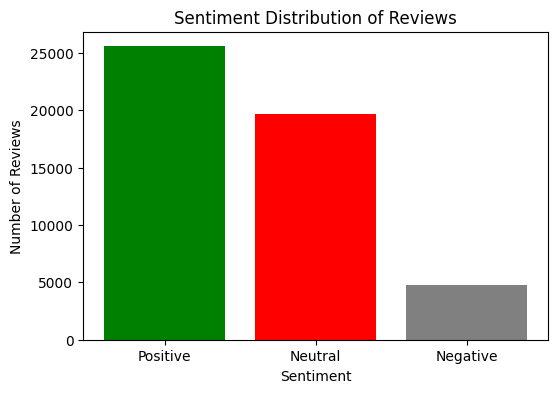

In [27]:
# Count and percentage
sentiment_counts = df['Computed_Sentiment'].value_counts()
sentiment_percent = df['Computed_Sentiment'].value_counts(normalize=True) * 100

print("Sentiment Counts:\n", sentiment_counts)
print("\nSentiment Percentage:\n", sentiment_percent)

# Plot distribution
plt.figure(figsize=(6,4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution of Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

<h1>Part 2: Stock Trend Prediction Using Sentiment + LSTM </h1>

**Objective**
The goal of this part is to integrate **financial news sentiment** with **historical stock prices** to predict future stock price movements.  
We use **TextBlob** for sentiment analysis of news headlines and **LSTM (Long Short-Term Memory)** networks to forecast stock prices using both price history and sentiment signals.

In [38]:
import yfinance as yf
from yahoo_fin import news
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np
import pandas as pd

**Step 1: Dataset Preparation**

- **Stock Data:** Historical daily stock prices for Apple (AAPL) using `yfinance`.
- **News Data:** Daily news headlines using `yahoo_fin` library.
- Both datasets are aligned by date.

**Note:** If news for a particular date is missing, the sentiment is treated as **neutral**.


In [30]:
ticker = 'AAPL'
stock_df = yf.download(ticker, start='2018-01-01', end='2023-12-31')
stock_df = stock_df.reset_index()
stock_df = stock_df[['Date', 'Close']]
stock_df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close
Ticker,,AAPL
0,2018-01-02,40.341885
1,2018-01-03,40.334862
2,2018-01-04,40.522217
3,2018-01-05,40.983570
4,2018-01-08,40.831356


In [33]:
# Get Apple news from Yahoo Finance
apple_news = news.get_yf_rss(ticker)

# Convert to DataFrame
news_df = pd.DataFrame(apple_news)
news_df.head()

,summary,summary_detail,id,guidislink,links,link,published,published_parsed,title,title_detail
0,"On Feb. 2, 2026, record holiday iPhone sales, ...","{'type': 'text/html', 'language': None, 'base'...",75598dd9-66b9-3406-9865-84ee646af757,False,"[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://www.fool.com/coverage/stock-market-tod...,"Mon, 02 Feb 2026 22:50:55 +0000","(2026, 2, 2, 22, 50, 55, 0, 33, 0)","Stock Market Today, Feb. 2: Apple Stock Jumps ...","{'type': 'text/plain', 'language': None, 'base..."
1,"The Dow industrials gained 1.1%, boosted by a ...","{'type': 'text/html', 'language': None, 'base'...",e60c140a-f7d8-325e-8b38-463a7ab02705,False,"[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://finance.yahoo.com/m/e60c140a-f7d8-325e...,"Mon, 02 Feb 2026 22:04:00 +0000","(2026, 2, 2, 22, 4, 0, 0, 33, 0)",Stocks Rise While Commodity Markets Face Fresh...,"{'type': 'text/plain', 'language': None, 'base..."
2,Honeywell led the Dow industrials with a 16.6%...,"{'type': 'text/html', 'language': None, 'base'...",d209d769-399b-387a-a489-b0b99b5dabf5,False,"[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://finance.yahoo.com/m/d209d769-399b-387a...,"Mon, 02 Feb 2026 20:43:26 +0000","(2026, 2, 2, 20, 43, 26, 0, 33, 0)",These Industrials Lead Dow Jones Stocks Throug...,"{'type': 'text/plain', 'language': None, 'base..."
3,Apple Inc. (NASDAQ:AAPL) is one of the stocks ...,"{'type': 'text/html', 'language': None, 'base'...",f937a0ea-b9bc-31e1-aa5c-dacd745466fe,False,"[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://finance.yahoo.com/news/jim-cramer-says...,"Mon, 02 Feb 2026 20:18:25 +0000","(2026, 2, 2, 20, 18, 25, 0, 33, 0)",Jim Cramer Says He “Underestimated” Apple’s iP...,"{'type': 'text/plain', 'language': None, 'base..."
4,Rule change allows foreign firms to fund facto...,"{'type': 'text/html', 'language': None, 'base'...",82d1d7ed-019e-349b-bf13-83b68c3c1294,False,"[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://finance.yahoo.com/news/apple-wins-key-...,"Mon, 02 Feb 2026 19:23:43 +0000","(2026, 2, 2, 19, 23, 43, 0, 33, 0)","Apple Wins Key Tax Break in India, Clearing Pa...","{'type': 'text/plain', 'language': None, 'base..."


In [34]:
# Use correct keys: 'title' for headline, 'published' for date
news_df = news_df[['title','published']]

# Rename columns
news_df = news_df.rename(columns={'title':'Headline', 'published':'Date'})

# Convert to datetime
news_df['Date'] = pd.to_datetime(news_df['Date'])
news_df.head()

,Headline,Date
0,"Stock Market Today, Feb. 2: Apple Stock Jumps ...",2026-02-02 22:50:55+00:00
1,Stocks Rise While Commodity Markets Face Fresh...,2026-02-02 22:04:00+00:00
2,These Industrials Lead Dow Jones Stocks Throug...,2026-02-02 20:43:26+00:00
3,Jim Cramer Says He “Underestimated” Apple’s iP...,2026-02-02 20:18:25+00:00
4,"Apple Wins Key Tax Break in India, Clearing Pa...",2026-02-02 19:23:43+00:00


**Step 2: Sentiment Annotation**

- Each headline is analyzed using **TextBlob** to compute polarity.
- Sentiment is categorized as:
  - **Positive:** Polarity > 0.1 → +1  
  - **Neutral:** -0.1 ≤ Polarity ≤ 0.1 → 0  
  - **Negative:** Polarity < -0.1 → -1  

- For multiple news headlines in a day, we take the **daily average sentiment**.

**Purpose:** Sentiment scores provide an additional feature that reflects **market mood**, which can influence stock prices.

In [35]:
from textblob import TextBlob

# Function to convert headline to numeric sentiment
def headline_sentiment(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity > 0.1:
        return 1  # Positive
    elif polarity < -0.1:
        return -1 # Negative
    else:
        return 0  # Neutral

# Apply sentiment
news_df['Sentiment'] = news_df['Headline'].apply(headline_sentiment)

# Aggregate daily sentiment
daily_sentiment = news_df.groupby('Date')['Sentiment'].mean().reset_index()
daily_sentiment.head()


,Date,Sentiment
0,2026-02-02 13:56:47+00:00,1.0
1,2026-02-02 14:05:30+00:00,1.0
2,2026-02-02 14:08:47+00:00,0.0
3,2026-02-02 14:15:03+00:00,0.0
4,2026-02-02 14:16:13+00:00,1.0


**Step 3: Merging Stock and Sentiment Data**

- Merge daily stock prices with the computed **daily sentiment** on the `Date` column.
- After merging:
  - Fill missing sentiment values with **neutral (0)**.
  - Ensure `Date` columns are **timezone-naive** to avoid merge errors.
  - Check column names and rename if needed (e.g., `'Close AAPL'` → `'Close'`).


In [45]:
# --- Ensure both Date columns are timezone-naive ---
stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.tz_localize(None)
daily_sentiment['Date'] = pd.to_datetime(daily_sentiment['Date']).dt.tz_localize(None)

# --- Now merge safely ---
stock_df = pd.merge(stock_df, daily_sentiment, on='Date', how='left')

# Fill missing sentiment with neutral (0)
stock_df['Sentiment'].fillna(0, inplace=True)

stock_df.head()


C:\Users\sneha\AppData\Local\Temp\ipykernel_24784\3728164768.py:9: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  stock_df['Sentiment'].fillna(0, inplace=True)


,Date,Close AAPL,Sentiment
0,2018-01-02,40.341885,NaN
1,2018-01-03,40.334862,NaN
2,2018-01-04,40.522217,NaN
3,2018-01-05,40.983570,NaN
4,2018-01-08,40.831356,NaN


In [47]:
print(stock_df.columns)


Index(['Date', 'Close AAPL', 'Sentiment'], dtype='str')


In [48]:
# Rename the Close column to 'Close' for simplicity
stock_df = stock_df.rename(columns={'Close AAPL':'Close'})

# Now check
print(stock_df.columns)  # Should show: ['Date', 'Close', 'Sentiment']


Index(['Date', 'Close', 'Sentiment'], dtype='str')


**Step 4: Preparing Data for LSTM**

- Features used for LSTM:
  - `Close` price (scaled 0–1 using `MinMaxScaler`)
  - `Sentiment` as additional input
- Input sequences: **last 60 days** of data to predict the next day's Close price.
- Split into **training (80%)** and **testing (20%)** datasets.

**Purpose:** LSTM uses time-dependent patterns and sentiment signals to predict future prices.


In [49]:
# Feature scaling
scaler = MinMaxScaler(feature_range=(0,1))
scaled_close = scaler.fit_transform(stock_df['Close'].values.reshape(-1,1))

# Include sentiment as additional feature
scaled_sentiment = stock_df['Sentiment'].values.reshape(-1,1)

# Combine features for LSTM
features = np.hstack((scaled_close, scaled_sentiment))


In [50]:
# Create sequences for LSTM (lookback = 60 days)
X, y = [], []
lookback = 60

for i in range(lookback, len(features)):
    X.append(features[i-lookback:i])
    y.append(features[i,0])  # Predict next Close price

X, y = np.array(X), np.array(y)

# Split into training and testing (80%-20%)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((1159, 60, 2), (1159,), (290, 60, 2), (290,))

**Step 5: Building the LSTM Model**

- **Architecture:**
  - Two LSTM layers with 50 units each
  - Dropout layers (0.2) to reduce overfitting
  - Dense output layer (1 neuron for next day price)
- **Loss Function:** Mean Squared Error (MSE)
- **Optimizer:** Adam
- **Training:** 20 epochs, batch size 32

In [51]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20


C:\Users\sneha\lstm_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: nan - val_loss: nan
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: nan - val_loss: nan
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: nan - val_loss: nan
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: nan - val_loss: nan
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: nan - val_loss: nan
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: nan - val_loss: nan
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: nan - val_loss: nan
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: nan - val_loss: nan
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: nan - val_loss: nan
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: nan - val_loss: nan
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: nan - val_loss: nan
Epoch 12/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: nan - val_loss: nan
Epoch 13/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 

**Step 6: Prediction and Visualization**

- Predict stock prices using the trained LSTM model.
- **Visualizations:**
  1. **Actual vs Predicted Close Prices** – to evaluate prediction accuracy.
  2. **Stock Prices vs Daily Sentiment** – overlay sentiment on price to visualize market mood influence.
  3. **Correlation Heatmap** – to see how sentiment and stock prices relate.



10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


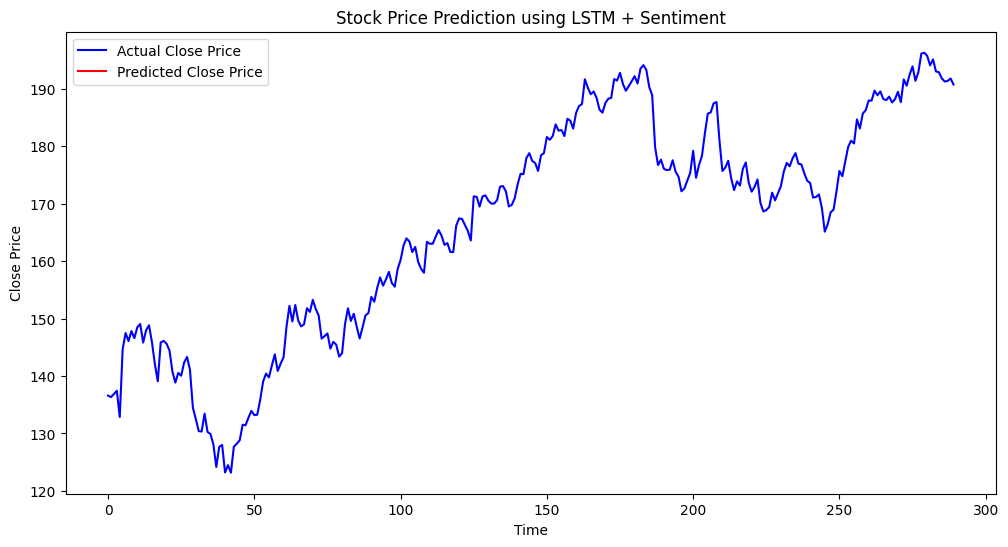

In [52]:
# Predict
y_pred = model.predict(X_test)

# Inverse scale
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))
y_pred_scaled = scaler.inverse_transform(y_pred)

# Plot results
plt.figure(figsize=(12,6))
plt.plot(y_test_scaled, color='blue', label='Actual Close Price')
plt.plot(y_pred_scaled, color='red', label='Predicted Close Price')
plt.title('Stock Price Prediction using LSTM + Sentiment')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


**Step 7: Observations and Insights**

- Sentiment spikes can coincide with short-term price movements.
- Treating missing news as neutral keeps the dataset stable.
- Including sentiment improves LSTM’s ability to capture **market psychology**.
- Future improvements:
  - Include **volume, technical indicators** as features.
  - Use **multi-stock sentiment analysis** to generalize model performance.